In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannot import add_stat_annotation
from adjustText import adjust_text

anot = pd.read_csv('aneuploidy_data_NEW.csv',index_col=0)

anot_CCLE = anot.copy()
anot_CCLE.index = anot_CCLE.loc[:,'CCLE_ID']

from cds import plotting

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
my_order = order=['Diploid','Aneuploid']

from taigapy import TaigaClient
tc = TaigaClient()

gene_effect_rnai_achilles = tc.get(name='demeter2-achilles-5386', version=13, file='gene_effect')
gene_effect_rnai_drive = tc.get(name='demeter2-drive-0591', version=12, file='gene_effect')
gene_effect_crispr_achilles = tc.get(name='avana-public-tentative-19q4-c2df', version=4, file='gene_effect')







/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


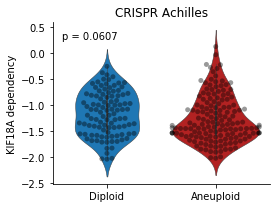

In [4]:
##########################################################################################
######################################### figex 8d #######################################
##########################################################################################

from scipy import stats

fix,ax = plt.subplots(figsize=(4,3))

shared = set(anot.index) & set(gene_effect_crispr_achilles.index)
temp = gene_effect_crispr_achilles.loc[shared]
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'



#fig,ax = plt.subplots()
sns.violinplot(y = 'KIF18A (81930)',x='ploidy', data = temp,saturation=1,linewidth=.5,order=my_order,palette = my_pal,ax=ax)
sns.swarmplot(y = 'KIF18A (81930)',x='ploidy', data = temp,color='black',alpha=.4,order=my_order)


plt.xlabel('')
plt.ylabel('KIF18A dependency')
plotting.simpleaxis()



tt,p_val = stats.ttest_ind(temp.loc[trus,'KIF18A (81930)'].dropna(),temp.loc[falsee,'KIF18A (81930)'].dropna())
ax.legend(title='p = '+ str(round(p_val,4)),frameon=False)
plt.title('CRISPR Achilles')
plt.tight_layout()
# plt.savefig('fig7d/KIF18A_crispr_achilles.pdf')
# plt.savefig('fig3c/prism.pdf')